In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# true labels for 20 data points
y_true = np.array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])
# classifier A predicted probabilities
y_pred_a = np.array([0.55, 0.72, 0.60, 0.54, 0.42, 0.65, 0.44, 0.89, 0.96, 0.38, 0.79, 0.53, 0.57, 0.93, 0.07, 0.09, 0.02, 0.83, 0.78, 0.87])
# classifier B predicted probabilities
y_pred_b = np.array([0.30, 0.96, 0.65, 0.26, 0.49, 0.84, 0.92, 0.85, 0.71, 0.52, 1.00, 0.00, 0.31, 0.90, 0.03, 0.08, 0.01, 0.00, 0.67, 1.00])

In [64]:
def calculate_tpr_fpr(y_true, y_pred, threshold):
	# Your code here
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(20):
        if((y_pred[i] >= threshold) and (y_true[i] == 1)):
            tp = tp + 1
        elif((y_pred[i] >= threshold) and (y_true[i] == 0)):
            fp = fp + 1
        elif((y_pred[i] < threshold) and (y_true[i] == 1)):
            fn = fn + 1
        elif((y_pred[i] < threshold) and (y_true[i] == 0)):
            tn = tn + 1
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    return (tpr, fpr)

In [65]:
tpr_a, fpr_a = calculate_tpr_fpr(y_true, y_pred_a, 0.5)
tpr_b, fpr_b = calculate_tpr_fpr(y_true, y_pred_b, 0.5)
print("Classifier A: TPR = {:.4f}, FPR = {:.4f}".format(tpr_a, fpr_a))
print("Classifier B: TPR = {:.4f}, FPR = {:.4f}".format(tpr_b, fpr_b))

Classifier A: TPR = 0.7273, FPR = 0.6667
Classifier B: TPR = 0.9091, FPR = 0.1111


In [66]:
thresholds = np.linspace(0,1,2000)
# For different decision thresholds, compute TPR and FPR of classifier A.
tpr_a_list = np.array([])
fpr_a_list = np.array([])
tpr_b_list = np.array([])
fpr_b_list = np.array([])
for i in range(1999):
    tpr, fpr = calculate_tpr_fpr(y_true, y_pred_a, thresholds[i])
    tpr_a_list = np.append(tpr_a_list, np.array([tpr]))
    fpr_a_list = np.append(fpr_a_list, np.array([fpr]))
# Your code here

# Repeat the same for classifier B.
for i in range(1999):
    tpr, fpr = calculate_tpr_fpr(y_true, y_pred_b, thresholds[i])
    tpr_b_list = np.append(tpr_b_list, np.array([tpr]))
    fpr_b_list = np.append(fpr_b_list, np.array([fpr]))
# Your code here

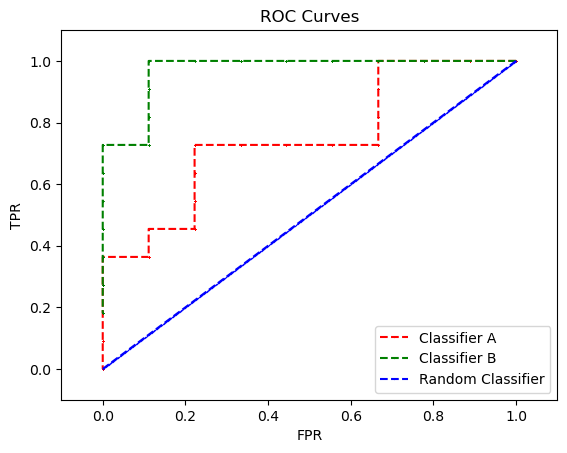

In [67]:
# Plot the ROC Curve
# Your code here
tpr_rand_list = np.linspace(0,1,1000)
fpr_rand_list = np.linspace(0,1,1000)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.plot(fpr_a_list,tpr_a_list, 'r+', linestyle = '--', markersize=0.3, label='Classifier A')
plt.plot(fpr_b_list,tpr_b_list, 'g+', linestyle = '--', markersize=0.3, label='Classifier B')
plt.plot(fpr_rand_list,tpr_rand_list, 'b+', linestyle = '--', markersize=0.3, label='Random Classifier')
plt.legend(loc = 0)

In [68]:
def compute_auc(tpr, fpr):
	# Your code here
	# can use np.trapz to calculate the area under the ROC curve
    indexes = np.argsort(fpr)

    sorted_fpr = fpr[indexes]
    sorted_tpr = tpr[indexes]

    area = np.trapz(sorted_tpr, sorted_fpr)
    return area

In [69]:
# Compute AUC
auc_value_a = compute_auc(np.array(tpr_a_list), np.array(fpr_a_list))
auc_value_b = compute_auc(np.array(tpr_b_list), np.array(fpr_b_list))
print("Classifier A: AUC value: {:.4f}".format(auc_value_a))
print("Classifier B: AUC value: {:.4f}".format(auc_value_b))

Classifier A: AUC value: 0.7273
Classifier B: AUC value: 0.9596


In [70]:
from sklearn.metrics import roc_auc_score

auc_a = roc_auc_score(y_true, y_pred_a)
auc_b = roc_auc_score(y_true, y_pred_b)
print("Classifier A: AUC value (using scikit learn): {:.4f}".format(auc_a))
print("Classifier B: AUC value (using scikit learn): {:.4f}".format(auc_b))

Classifier A: AUC value (using scikit learn): 0.7475
Classifier B: AUC value (using scikit learn): 0.9697
